<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 임으로 만든 데이터로 모델링합니다.
- Linear Regression, Ridge, Lasso, Elasticnet 알고리즘으로 모델링합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [6]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [1]:
# 데이터 만들기
from sklearn.datasets import make_regression
x, y, c = make_regression(n_samples=500, n_features=200, n_informative=15, bias=1, noise=60.0, coef=True, random_state=1)

**2) 학습용, 평가용 데이터 분리**

In [2]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**3) 정규화**

In [3]:
# 모듈 불러오기
#from sklearn.preprocessing import MinMaxScaler

# 정규화
#scaler = MinMaxScaler()
#scaler.fit(x_train)
#x_train= scaler.transform(x_train)
#x_test= scaler.transform(x_test)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

## 4.1.Linear Regression

- 우선 Linear Regression 알고리즘으로 모델링합니다.

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2 $$

In [4]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print('학습성능:', model.score(x_train, y_train))
print('평가성능:', model.score(x_test, y_test))

학습성능: 0.9803903050465909
평가성능: 0.8476766578971904


- 변수들의 가중치를 확인해 보면 모든 변수의 가중치가 존재함을 알 수 있습니다.

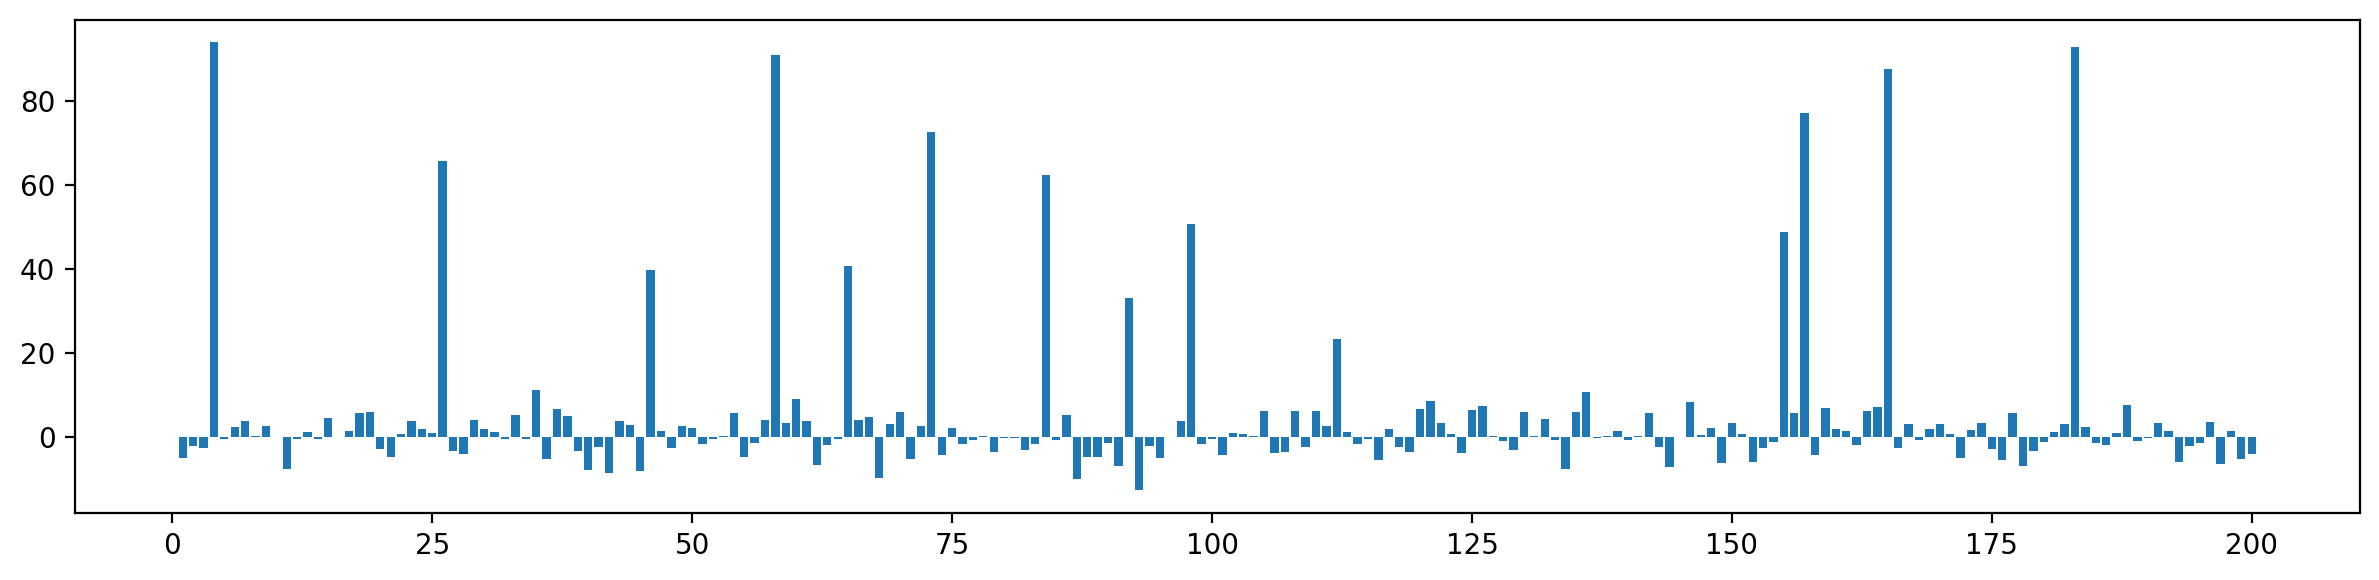

In [7]:
# 가중치 시각화 
plt.figure(figsize=(12, 3))
plt.bar(x=range(1, 201), height=model.coef_)
plt.tight_layout()
plt.show()

## 4.2.Ridge

- Ridge 알고리즘을 사용하면 변수들의 가중치 크기를 제어할 수 있습니다.
- 그렇다고 특정 변수의 가중치를 0으로 바꾸지는 않습니다.

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2+\lambda\sum_{j=1}^{p}(w_j)^2 $$

In [8]:
# 모델링
from sklearn.linear_model import Ridge

model_rg = Ridge(alpha=1)
model_rg.fit(x_train, y_train)
y_pred = model_rg.predict(x_test)

# 성능 확인
print('학습성능:', model_rg.score(x_train, y_train))
print('평가성능:', model_rg.score(x_test, y_test))

학습성능: 0.980374422760488
평가성능: 0.8500997356372503


- alpha 값을 변화시키면서 가중치 정보를 수집합니다.

In [9]:
# 가중치 정보 수집
result = []
alpha = [0.1, 1, 10, 100, 1000, 5000]
for a in alpha:
    model_rg = Ridge(alpha=a)
    model_rg.fit(x_train, y_train)
    result.append(model_rg.coef_)

# 데이터프레임 만들기
df_coef = pd.DataFrame(result, index=alpha)

# 확인
df_coef

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0.1,-5.034471,-2.153433,-2.537905,93.748077,-0.347665,2.528072,3.967420,0.258773,2.585824,0.059231,...,3.365416,1.470011,-5.885094,-1.979307,-1.340086,3.678243,-6.287297,1.606352,-5.128586,-3.909571
1.0,-5.089640,-2.259669,-2.507006,93.227862,-0.118254,2.591377,3.925839,0.270417,2.470044,0.123736,...,3.415044,1.243780,-6.369431,-1.961412,-1.326011,3.616113,-6.211637,1.561901,-5.013327,-3.800787
10.0,-5.561383,-3.211380,-2.327649,88.719947,1.545764,3.158182,3.710982,0.287475,1.565303,0.714473,...,3.859799,-0.469674,-10.073953,-1.767604,-1.316668,2.974595,-5.591595,1.271072,-4.033531,-2.948226
100.0,-7.039323,-6.642232,-2.526436,66.336419,4.011168,5.279131,3.827070,-1.055883,-0.949406,2.859161,...,5.906525,-3.733507,-18.655611,-1.121145,-2.541340,-0.482597,-2.966544,1.015112,-0.436487,-0.309159
1000.0,-3.634640,-4.436782,-1.556194,24.655608,0.849252,3.543798,2.319307,-1.837795,-1.521159,1.252105,...,4.273613,-0.998234,-11.036763,-1.570016,-2.368303,-1.754308,0.347246,0.904953,0.905829,1.061475
5000.0,-0.988104,-1.420013,-0.503508,6.941745,0.062806,1.126384,0.752843,-0.643245,-0.586224,0.261307,...,1.382352,-0.082610,-3.374547,-0.705101,-0.814684,-0.590902,0.324666,0.337591,0.305558,0.446331


- alpha 값 변화에 따른 변수들 가중치 변화를 시각화로 확인합니다.

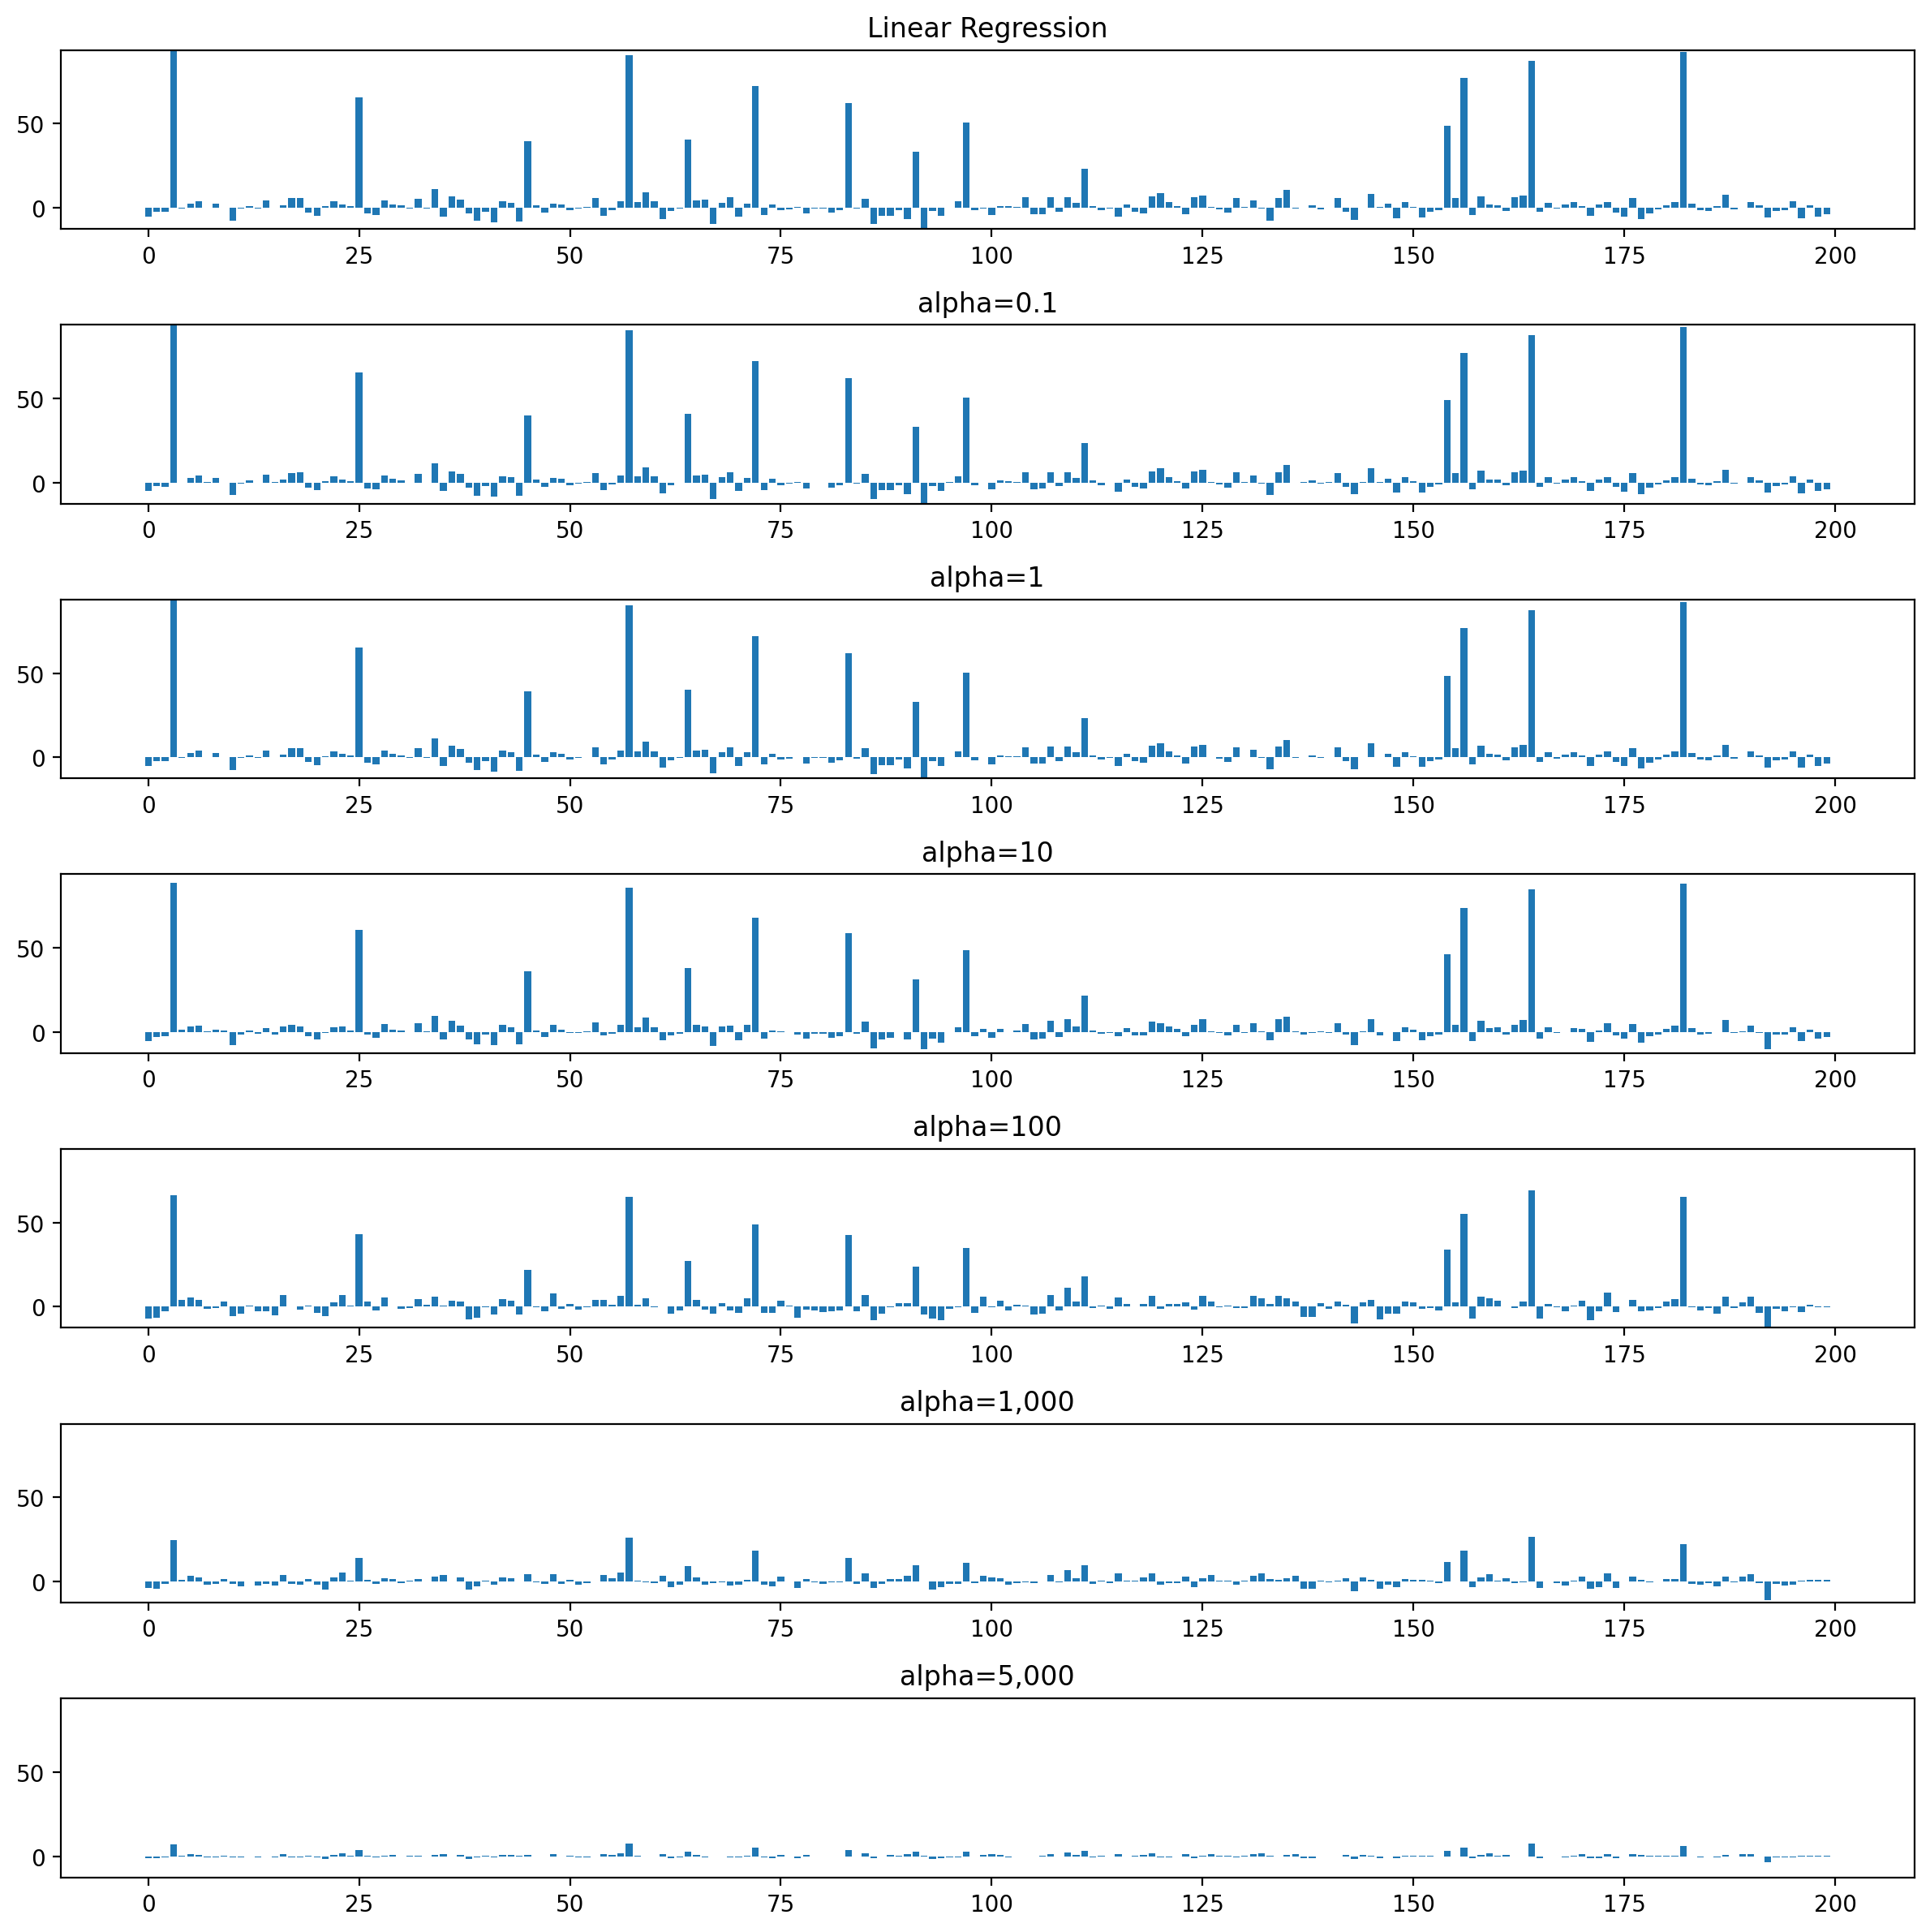

In [10]:
# y축 최솟값, 최댓값 얻기
y_min = model.coef_.min()
y_max = model.coef_.max()
alpha = [0.1, 1, 10, 100, 1000, 5000]

# 회귀 계수 변화 시각화
plt.figure(figsize=(12, 12))
plt.subplot(7, 1, 1)
plt.title('Linear Regression')
plt.bar(x=range(0, 200), height=model.coef_)
plt.ylim(model.coef_.min(), model.coef_.max())
for idx, num in enumerate(alpha):
    plt.subplot(7, 1, idx+2)
    plt.title(f'alpha={num:,}')
    plt.bar(x=range(0, 200), height=df_coef.loc[num])
    plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

- RidgeCV를 사용하면 주어진 범위 내에서 최선의 파라미터 값을 찾을 수 있습니다.

In [11]:
# 모델링(Ridge CV)
from sklearn.linear_model import RidgeCV

alpha = np.linspace(0.1, 100, 50)
model_rg = RidgeCV(alphas=alpha, cv=5)
model_rg.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model_rg.score(x_train, y_train))
print('평가성능:', model_rg.score(x_test, y_test))
print('-' * 28)
print('alpha:', model_rg.alpha_)

학습성능: 0.9790691302837473
평가성능: 0.8599891965937051
----------------------------
alpha: 10.29387755102041


## 4.2.Lasso

- Lasso 알고리즘을 사용하면 중요하지 않은 변수의 가중치를 0으로 바꿀 수 있습니다.
- 이를 통해 불필요한 변수들을 제거할 수 있습니다. 

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2+\lambda\sum_{j=1}^{p}|w_j| $$

In [12]:
# 모델링
from sklearn.linear_model import Lasso

model_ls = Lasso(alpha=1)
model_ls.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model_ls.score(x_train, y_train))
print('평가성능:', model_ls.score(x_test, y_test))

학습성능: 0.9758568101430813
평가성능: 0.9111690467143299


- alpha 값을 변화시키면서 가중치 정보를 수집합니다.

In [13]:
# 가중치 정보 수집
result = []
alpha = [0.1, 1, 10, 20, 50]
for a in alpha:
    model_ls = Lasso(alpha=a)
    model_ls.fit(x_train, y_train)
    result.append(model_ls.coef_)

# 데이터프레임 만들기
df_coef = pd.DataFrame(result, index=alpha)

# 확인
df_coef

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0.1,-4.515921,-2.174267,-1.978628,93.747281,-0.301156,2.253840,4.447357,0.0,2.066697,0.0,...,2.901808,0.707097,-6.170025,-1.657238,-0.820988,3.103757,-6.160478,1.454597,-4.790230,-3.279972
1.0,-2.965830,-1.491047,-0.349249,92.434494,-0.000000,0.915661,4.762225,-0.0,0.000000,0.0,...,0.419321,-0.007485,-6.796706,-0.025412,0.000000,0.000000,-5.550002,0.553951,-3.726317,-0.000000
10.0,-0.000000,-0.000000,-0.000000,84.529300,-0.000000,0.000000,0.000000,-0.0,-0.000000,0.0,...,0.000000,-0.000000,-3.146490,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000
20.0,-0.000000,-0.000000,-0.000000,76.408975,-0.000000,0.000000,0.000000,-0.0,-0.000000,0.0,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000
50.0,-0.000000,-0.000000,-0.000000,51.605220,-0.000000,0.000000,0.000000,-0.0,-0.000000,0.0,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000


- alpha 값 변화에 따른 변수들 가중치 변화를 시각화로 확인합니다.

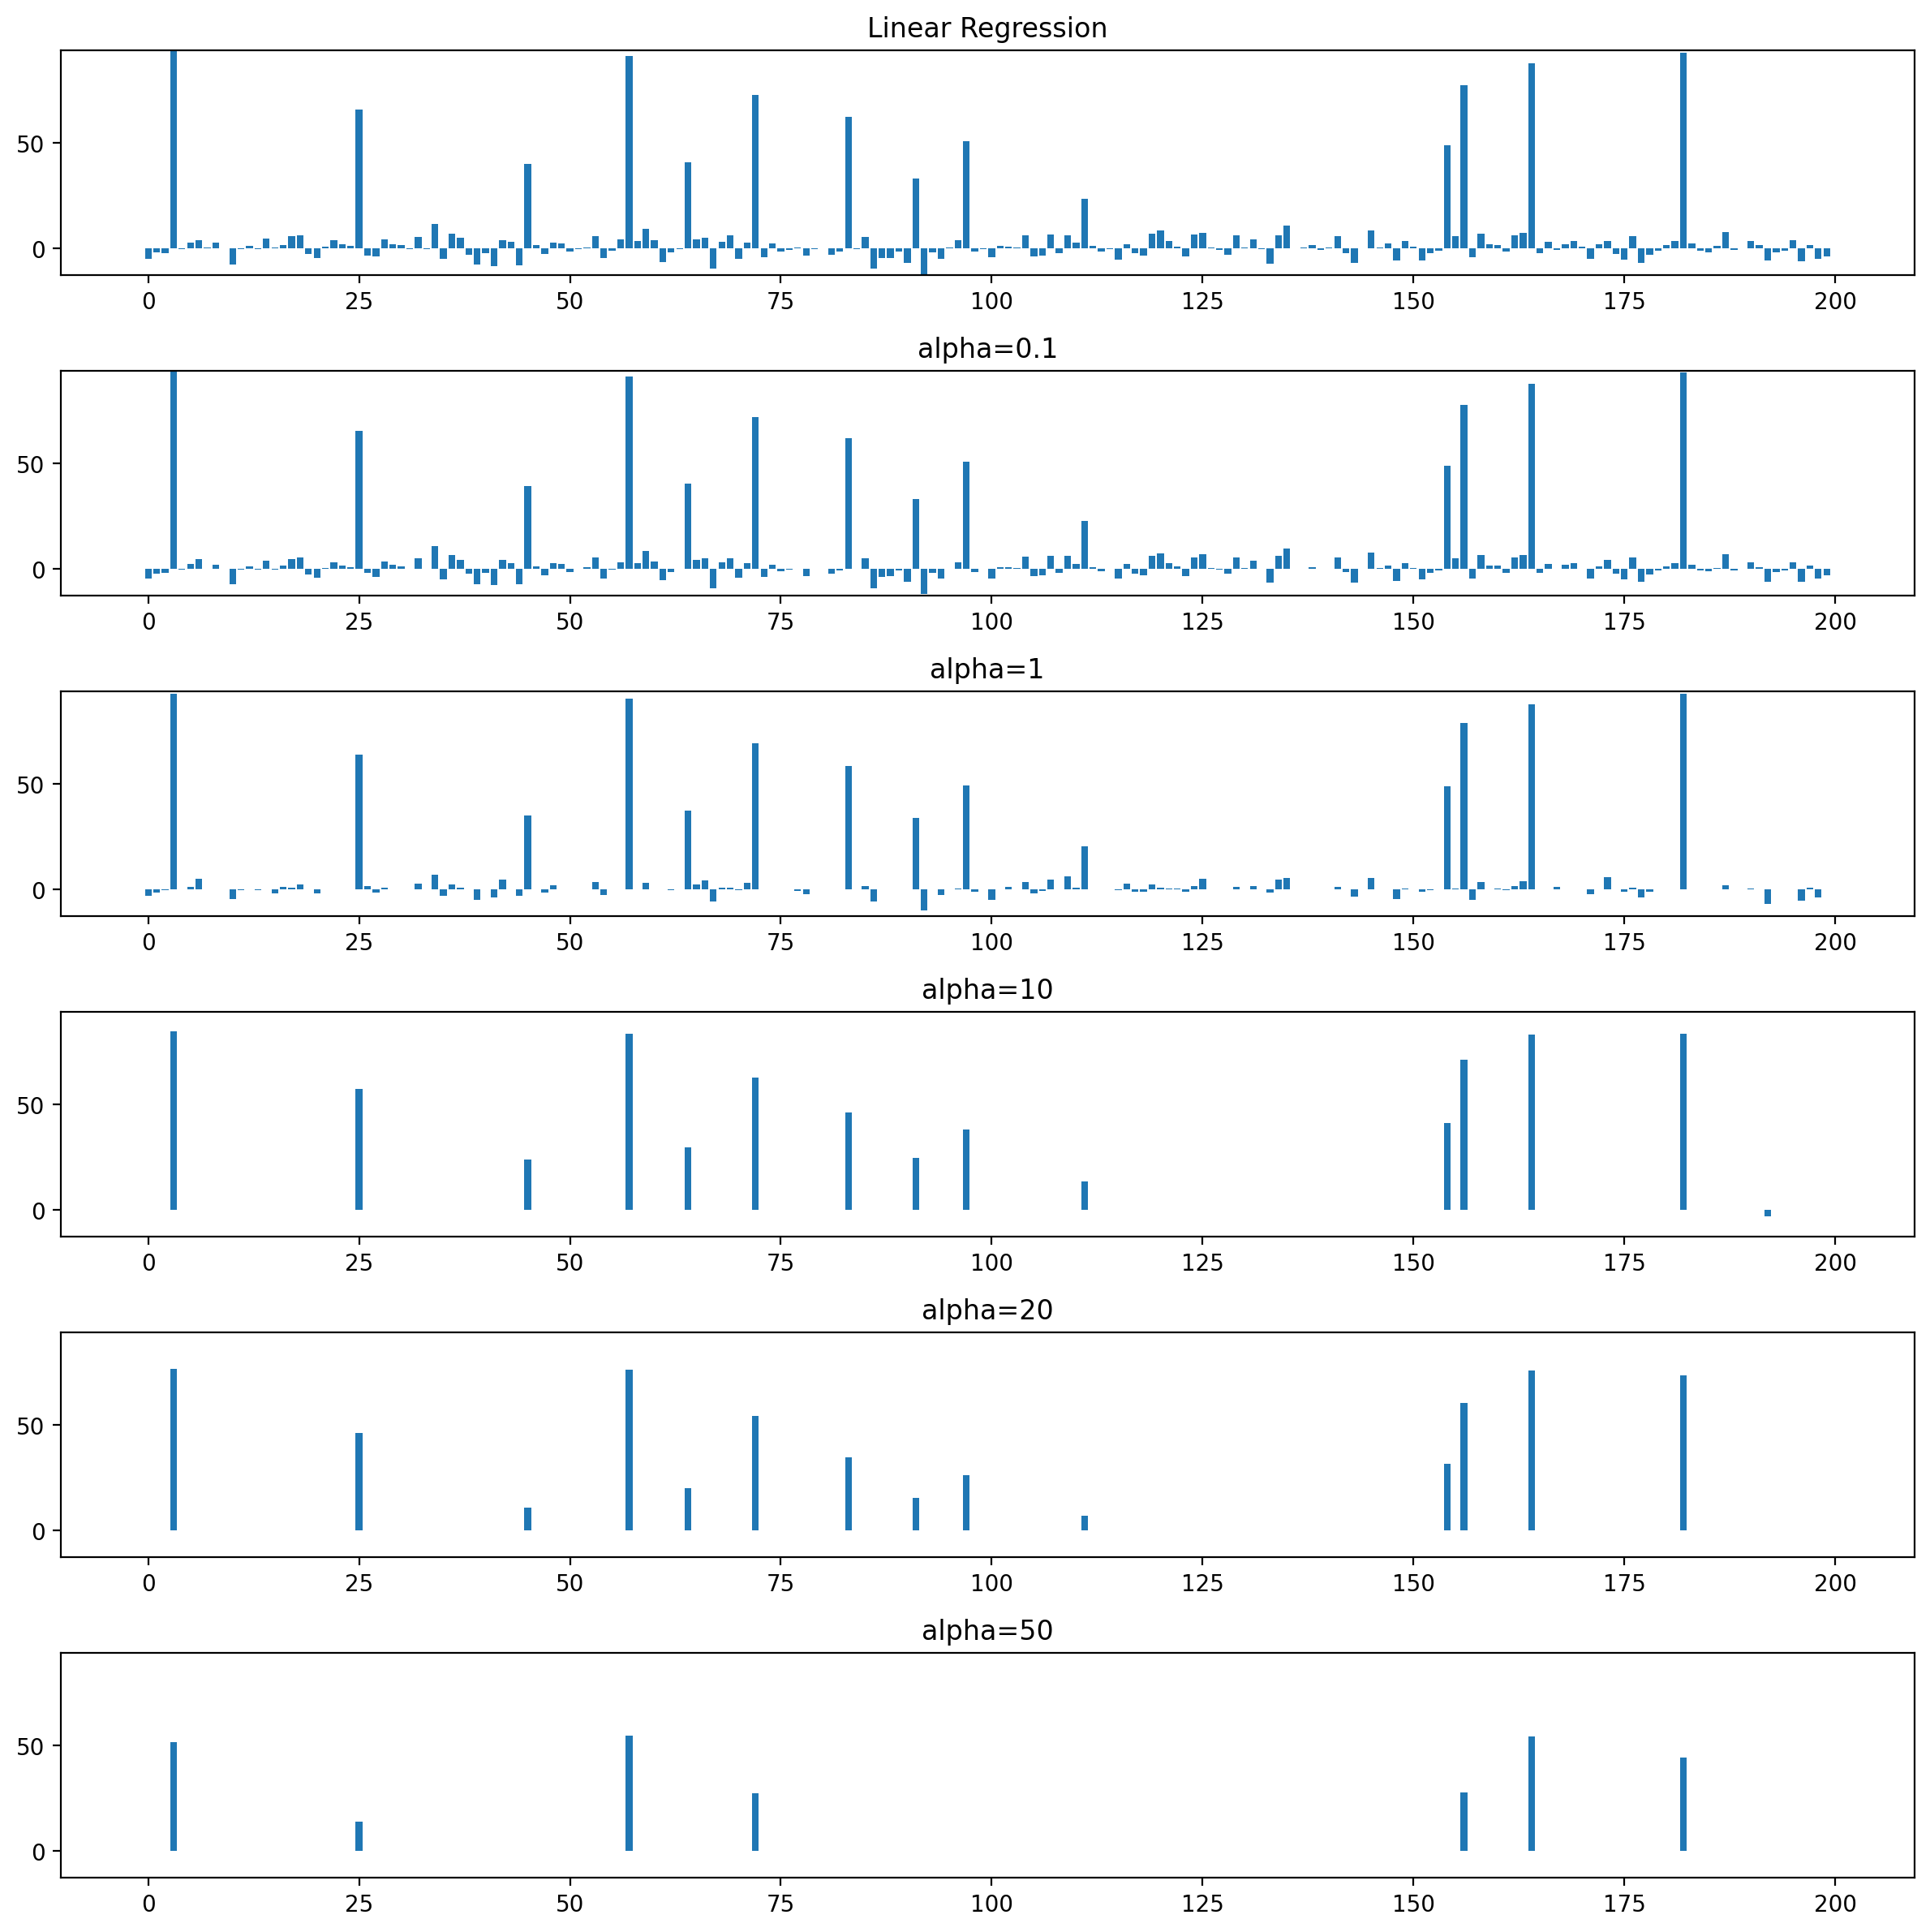

In [14]:
# y축 최솟값, 최댓값 얻기
y_min = model.coef_.min()
y_max = model.coef_.max()
alpha = [0.1, 1, 10, 20, 50]

# 회귀 계수 변화 시각화
plt.figure(figsize=(12, 12))
plt.subplot(6, 1, 1)
plt.title('Linear Regression')
plt.bar(x=range(0, 200), height=model.coef_)
plt.ylim(model.coef_.min(), model.coef_.max())
for idx, num in enumerate(alpha):
    plt.subplot(6, 1, idx+2)
    plt.title(f'alpha={num:,}')
    plt.bar(x=range(0, 200), height=df_coef.loc[num])
    plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

- LassoCV를 사용하면 주어진 범위 내에서 최선의 파라미터 값을 찾을 수 있습니다.

In [ ]:
# 모델링(LassoCV)
from sklearn.linear_model import LassoCV

alpha = np.linspace(0.1, 100, 50)
model_ls = LassoCV(alphas=alpha, cv=5, random_state=1)
model_ls.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model_ls.score(x_train, y_train))
print('평가성능:', model_ls.score(x_test, y_test))
print('-' * 28)
print('alpha:', model_ls.alpha_)

## 4.3.ElasticNet

- Elasticnet 알고리즘을 사용하면 Ridge와 Lasso 기능을 같이 사용할 수 있습니다.

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2+\gamma\lambda\sum_{j=1}^{p}|w_j|+\frac{1-\gamma}{2}\lambda\sum_{j=1}^{p}(w_j)^2 $$

In [16]:
# 모델링
from sklearn.linear_model import ElasticNet

model_el = ElasticNet(alpha=0.01, l1_ratio=0.5) # 감마값
model_el.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model_el.score(x_train, y_train))
print('평가성능:', model_el.score(x_test, y_test))

학습성능: 0.9803400128827975
평가성능: 0.8523917451442478


- ElasticNetCV를 사용하면 주어진 범위 내에서 최선의 파라미터 값을 찾을 수 있습니다.

In [17]:
# 모델링(ElasticNetCV)
from sklearn.linear_model import ElasticNetCV

l1 = np.linspace(0.1, 1, 10)                         
alpha = np.linspace(0.1, 10, 50)
model_el = ElasticNetCV(l1_ratio=l1, alphas=alpha, cv=5, random_state=1)
model_el.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model_el.score(x_train, y_train))
print('평가성능:', model_el.score(x_test, y_test))
print('-' * 28)
print('l1_ratio:', model_el.l1_ratio_)
print('alpha:', model_el.alpha_)

학습성능: 0.9627579135684302
평가성능: 0.9242502971912172
----------------------------
l1_ratio: 1.0
alpha: 3.938775510204082


- 변수들의 가중치를 확인해 보면 모든 변수의 가중치가 줄었거나 제거됨을 알 수 있습니다.
- 본 예제에서는 Lasso와 같은 결과를 보여줍니다.

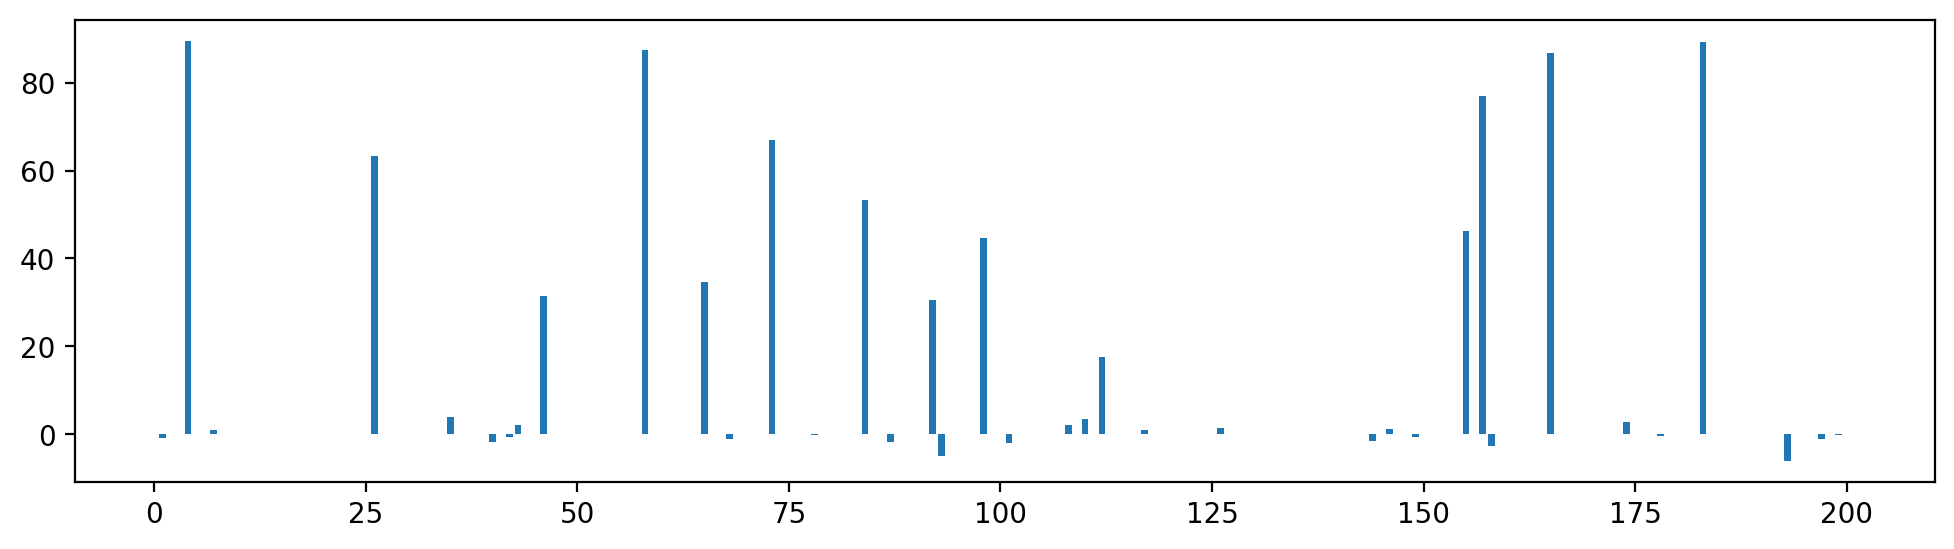

In [18]:
# 가중치 시각화 
plt.figure(figsize=(12, 3))
plt.bar(x=range(1, 201), height=model_el.coef_)
plt.show()